In [128]:
from sqlalchemy import create_engine
import pandas as pd
from sqlalchemy import inspect
from datetime import datetime as dt
from datetime import datetime, timedelta
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport


In [129]:
engine = create_engine("sqlite:///sqlite/MTA_1.db")
all_tables = inspect(engine)
print(all_tables.get_table_names())

['mta']


In [130]:
#data = generate_dates()
#data.to_sql("mta", engine, if_exists="append")

In [131]:
engine.execute("DELETE from mta where ENTRIES='ENTRIES'")

In [282]:
mta_data = pd.read_sql('SELECT * FROM mta;', engine)
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418


In [279]:
#chech for nulls 
pd.isnull(mta_data).sum()
mta_data
#check number of stations I have in my dataframe
df = mta_data.groupby('STATION').size()
mta_data.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISON', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'DATETIME', 'WEEK_DAYS', 'DELTA'],
      dtype='object')

In [292]:
#combine 2 columns (data & Time)
mta_data["DATETIME"] = pd.to_datetime(mta_data.DATE + " " + mta_data.TIME, errors='coerce')
#week days
mta_data['WEEK_DAYS'] = pd.to_datetime(mta_data['DATE']).dt.day_name()
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,DELTA,DATETIME,WEEK_DAYS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,8.0,2021-05-29 00:00:00,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,22.0,2021-05-29 04:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,86.0,2021-05-29 08:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,140.0,2021-05-29 12:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,145.0,2021-05-29 16:00:00,Saturday


In [283]:
mta_data['DELTA'] = (mta_data['ENTRIES'] - mta_data['ENTRIES'].shift(-1)).abs() + (mta_data['EXITS'] - mta_data['EXITS'].shift(-1)).abs()
mta_data.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,DELTA
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,8.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,22.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,86.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,140.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,145.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,20:00:00,REGULAR,7579021,2590439,69.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,00:00:00,REGULAR,7579078,2590451,7.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,04:00:00,REGULAR,7579084,2590452,3.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,08:00:00,REGULAR,7579085,2590454,47.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2021,12:00:00,REGULAR,7579093,2590493,117.0


In [284]:
mta_data.sort_values('DELTA', ascending=False).head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,DELTA
190655,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,06/04/2021,21:00:00,REGULAR,130576,394400,3.966153e+09
400094,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,06/11/2021,21:00:00,REGULAR,133984,404907,3.966127e+09
609321,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,06/18/2021,21:00:00,REGULAR,137324,415282,3.966097e+09
818854,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,06/25/2021,21:00:00,REGULAR,140502,425572,3.966069e+09
1028506,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/02/2021,21:00:00,REGULAR,143804,435553,3.966040e+09
1238149,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/09/2021,21:00:00,REGULAR,146921,445308,3.966013e+09
1447557,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/16/2021,21:00:00,REGULAR,150100,455612,3.965986e+09
1656861,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/23/2021,21:00:00,REGULAR,153563,465778,3.965957e+09
1866343,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,07/30/2021,21:00:00,REGULAR,156868,476770,3.965928e+09
2075858,R523,R147,00-00-03,61 ST WOODSIDE,7,IRT,08/06/2021,21:00:00,REGULAR,160166,487550,3.965898e+09


In [285]:
mta_data.DELTA.describe()

count    2.722609e+06
mean     3.211902e+06
std      8.305551e+07
min      0.000000e+00
25%      1.500000e+01
50%      7.800000e+01
75%      2.010000e+02
max      3.966153e+09
Name: DELTA, dtype: float64

In [286]:
# group by single turnstile 

tun_id = mta_data.groupby(['C/A', 'UNIT', 'SCP', 'STATION'])['DELTA'].sum().sort_values(ascending=False)
tun_id

C/A   UNIT  SCP       STATION       
R523  R147  00-00-03  61 ST WOODSIDE    5.155796e+10
N501  R020  01-03-02  47-50 STS ROCK    5.148511e+10
R523  R147  00-00-04  61 ST WOODSIDE    5.123880e+10
N501  R020  01-03-01  47-50 STS ROCK    5.106799e+10
R116  R030  00-00-01  CHAMBERS ST       4.977825e+10
                                            ...     
R534  R055  01-05-00  FLUSHING-MAIN     1.157000e+03
N307  R359  00-05-00  COURT SQ-23 ST    1.040000e+03
D015  R396  00-05-00  AVENUE U          9.800000e+02
N541  R241  01-05-00  15 ST-PROSPECT    8.320000e+02
B020  R263  00-02-02  AVENUE H          3.760000e+02
Name: DELTA, Length: 5019, dtype: float64

In [287]:

groups = tun_id.groupby(['STATION']).sum().sort_values(ascending=False)

top_10_daily_ave = groups.head(10) / 126

top_10_daily_ave.reset_index()

,STATION,DELTA
0,125 ST,2.183631e+09
1,42 ST-PORT AUTH,1.989646e+09
2,34 ST-PENN STA,1.943147e+09
3,161/YANKEE STAD,1.765759e+09
4,34 ST-HERALD SQ,1.471082e+09
5,CANAL ST,1.458729e+09
6,FULTON ST,1.433477e+09
7,23 ST,1.379536e+09
8,167 ST,1.333368e+09
9,18 AV,1.324853e+09


In [288]:
#top 10 busiest stations
top_10_stations = tun_id.head(10)
top_10_stations

#taking the average of interval (from 29/5/2021 to 27/8/2021) 90 days:b

top_10_stations_ave = top_10_stations/90
top_10_stations_ave.sort_values()

C/A   UNIT  SCP       STATION        
N100  R252  00-00-01  HIGH ST            5.338093e+08
N062  R011  01-00-01  42 ST-PORT AUTH    5.362949e+08
N534  R220  01-00-02  CARROLL ST         5.378276e+08
C004  R089  01-06-01  JAY ST-METROTEC    5.437724e+08
R116  R030  00-00-02  CHAMBERS ST        5.529474e+08
            00-00-01  CHAMBERS ST        5.530917e+08
N501  R020  01-03-01  47-50 STS ROCK     5.674221e+08
R523  R147  00-00-04  61 ST WOODSIDE     5.693200e+08
N501  R020  01-03-02  47-50 STS ROCK     5.720568e+08
R523  R147  00-00-03  61 ST WOODSIDE     5.728662e+08
Name: DELTA, dtype: float64

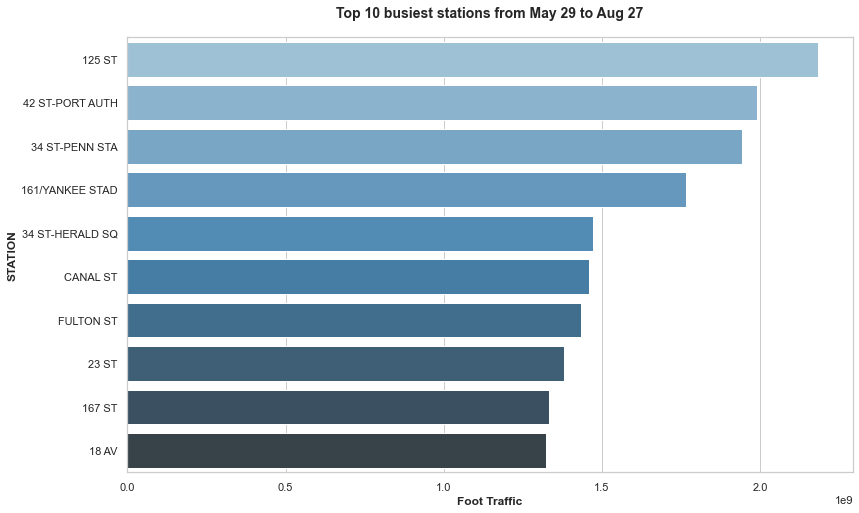

In [290]:
#the top 10 busiest stations over the interval

sns.set(style="whitegrid")

plt.figure(figsize=(13,8))

sns.barplot( x=top_10_daily_ave, y=top_10_daily_ave.index, palette="Blues_d", orient="h")

plt.title('Top 10 busiest stations from May 29 to Aug 27', weight = 'bold', pad='20', size=14)
plt.xlabel('Foot Traffic', weight='bold')
plt.ylabel('STATION', weight='bold');


In [293]:
top_stations_list = ['125 ST','42 ST-PORT AUTH', '34 ST-PENN STA', '161/YANKEE STAD', '34 ST-HERALD SQ']


turns_daily = mta_data.groupby(['STATION', 'WEEK_DAYS'])['DELTA'].sum()

TOP_busiest_stations = turns_daily.loc[top_stations_list]
TOP_busiest_stations

STATION          WEEK_DAYS
125 ST           Friday       2.751291e+11
                 Monday       7.850210e+05
                 Saturday     6.584590e+05
                 Sunday       5.173810e+05
                 Thursday     8.759170e+05
                 Tuesday      4.673845e+06
                 Wednesday    8.813430e+05
42 ST-PORT AUTH  Friday       2.506881e+11
                 Monday       8.518730e+05
                 Saturday     2.886947e+06
                 Sunday       5.578200e+05
                 Thursday     1.156372e+06
                 Tuesday      9.451250e+05
                 Wednesday    9.554830e+05
34 ST-PENN STA   Friday       2.448125e+11
                 Monday       1.334216e+06
                 Saturday     1.082683e+06
                 Sunday       5.740714e+06
                 Thursday     7.989456e+06
                 Tuesday      1.671543e+06
                 Wednesday    6.278391e+06
161/YANKEE STAD  Friday       2.224769e+11
                 Monday    

In [260]:
#profile = ProfileReport(, title="MTA Profiling Report")
